# Figure Spatial carbon maps

In [1]:
# Libraries
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Directories
dir04 = '../paper_deficit/output/04_out/'
dir06 = '../paper_deficit/output/06_eval/'
dir_nearth = '../data/naturalearth/'

---

In [3]:
# Libraries
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import dask

# Initialize dask
cluster = SLURMCluster(
    queue='compute',                      # SLURM queue to use
    cores=24,                             # Number of CPU cores per job
    memory='256 GB',                      # Memory per job
    account='bm0891',                     # Account allocation
    interface="ib0",                      # Network interface for communication
    walltime='01:00:00',                  # Maximum runtime per job
    local_directory='../dask/',           # Directory for local storage
    job_extra_directives=[                # Additional SLURM directives for logging
        '-o ../dask/LOG_worker_%j.o',     # Output log
        '-e ../dask/LOG_worker_%j.e'      # Error log
    ]
)

# Scale dask cluster
cluster.scale(jobs=2)

# Configurate dashboard url
dask.config.config.get('distributed').get('dashboard').update(
    {'link': '{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'}
)

# Create client
client = Client(cluster)

client

<Client: 'tcp://10.128.3.159:35849' processes=0 threads=0, memory=0 B>

---

In [4]:
# Get coastline shapefile
coastline110 = gpd.read_file(
        dir_nearth + 'ne_110m_coastline/ne_110m_coastline.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /work/bm0891/b381155/kernels/deficit_kernel312/share/proj failed


In [5]:
# Get data
ds_agbc = xr.open_dataset(os.path.join(dir04, 'agbc.nc'))
ds_bgbc = xr.open_dataset(os.path.join(dir04, 'bgbc.nc'))
ds_soc = xr.open_dataset(os.path.join(dir04, 'soc.nc'))

# Change _fillValue
ds_agbc = ds_agbc.where(ds_agbc != -32768).persist()
ds_bgbc = ds_bgbc.where(ds_bgbc != -32768).persist()
ds_soc = ds_soc.where(ds_soc != -32768).persist()

CPU times: user 32min 5s, sys: 5min 16s, total: 37min 21s
Wall time: 37min 16s


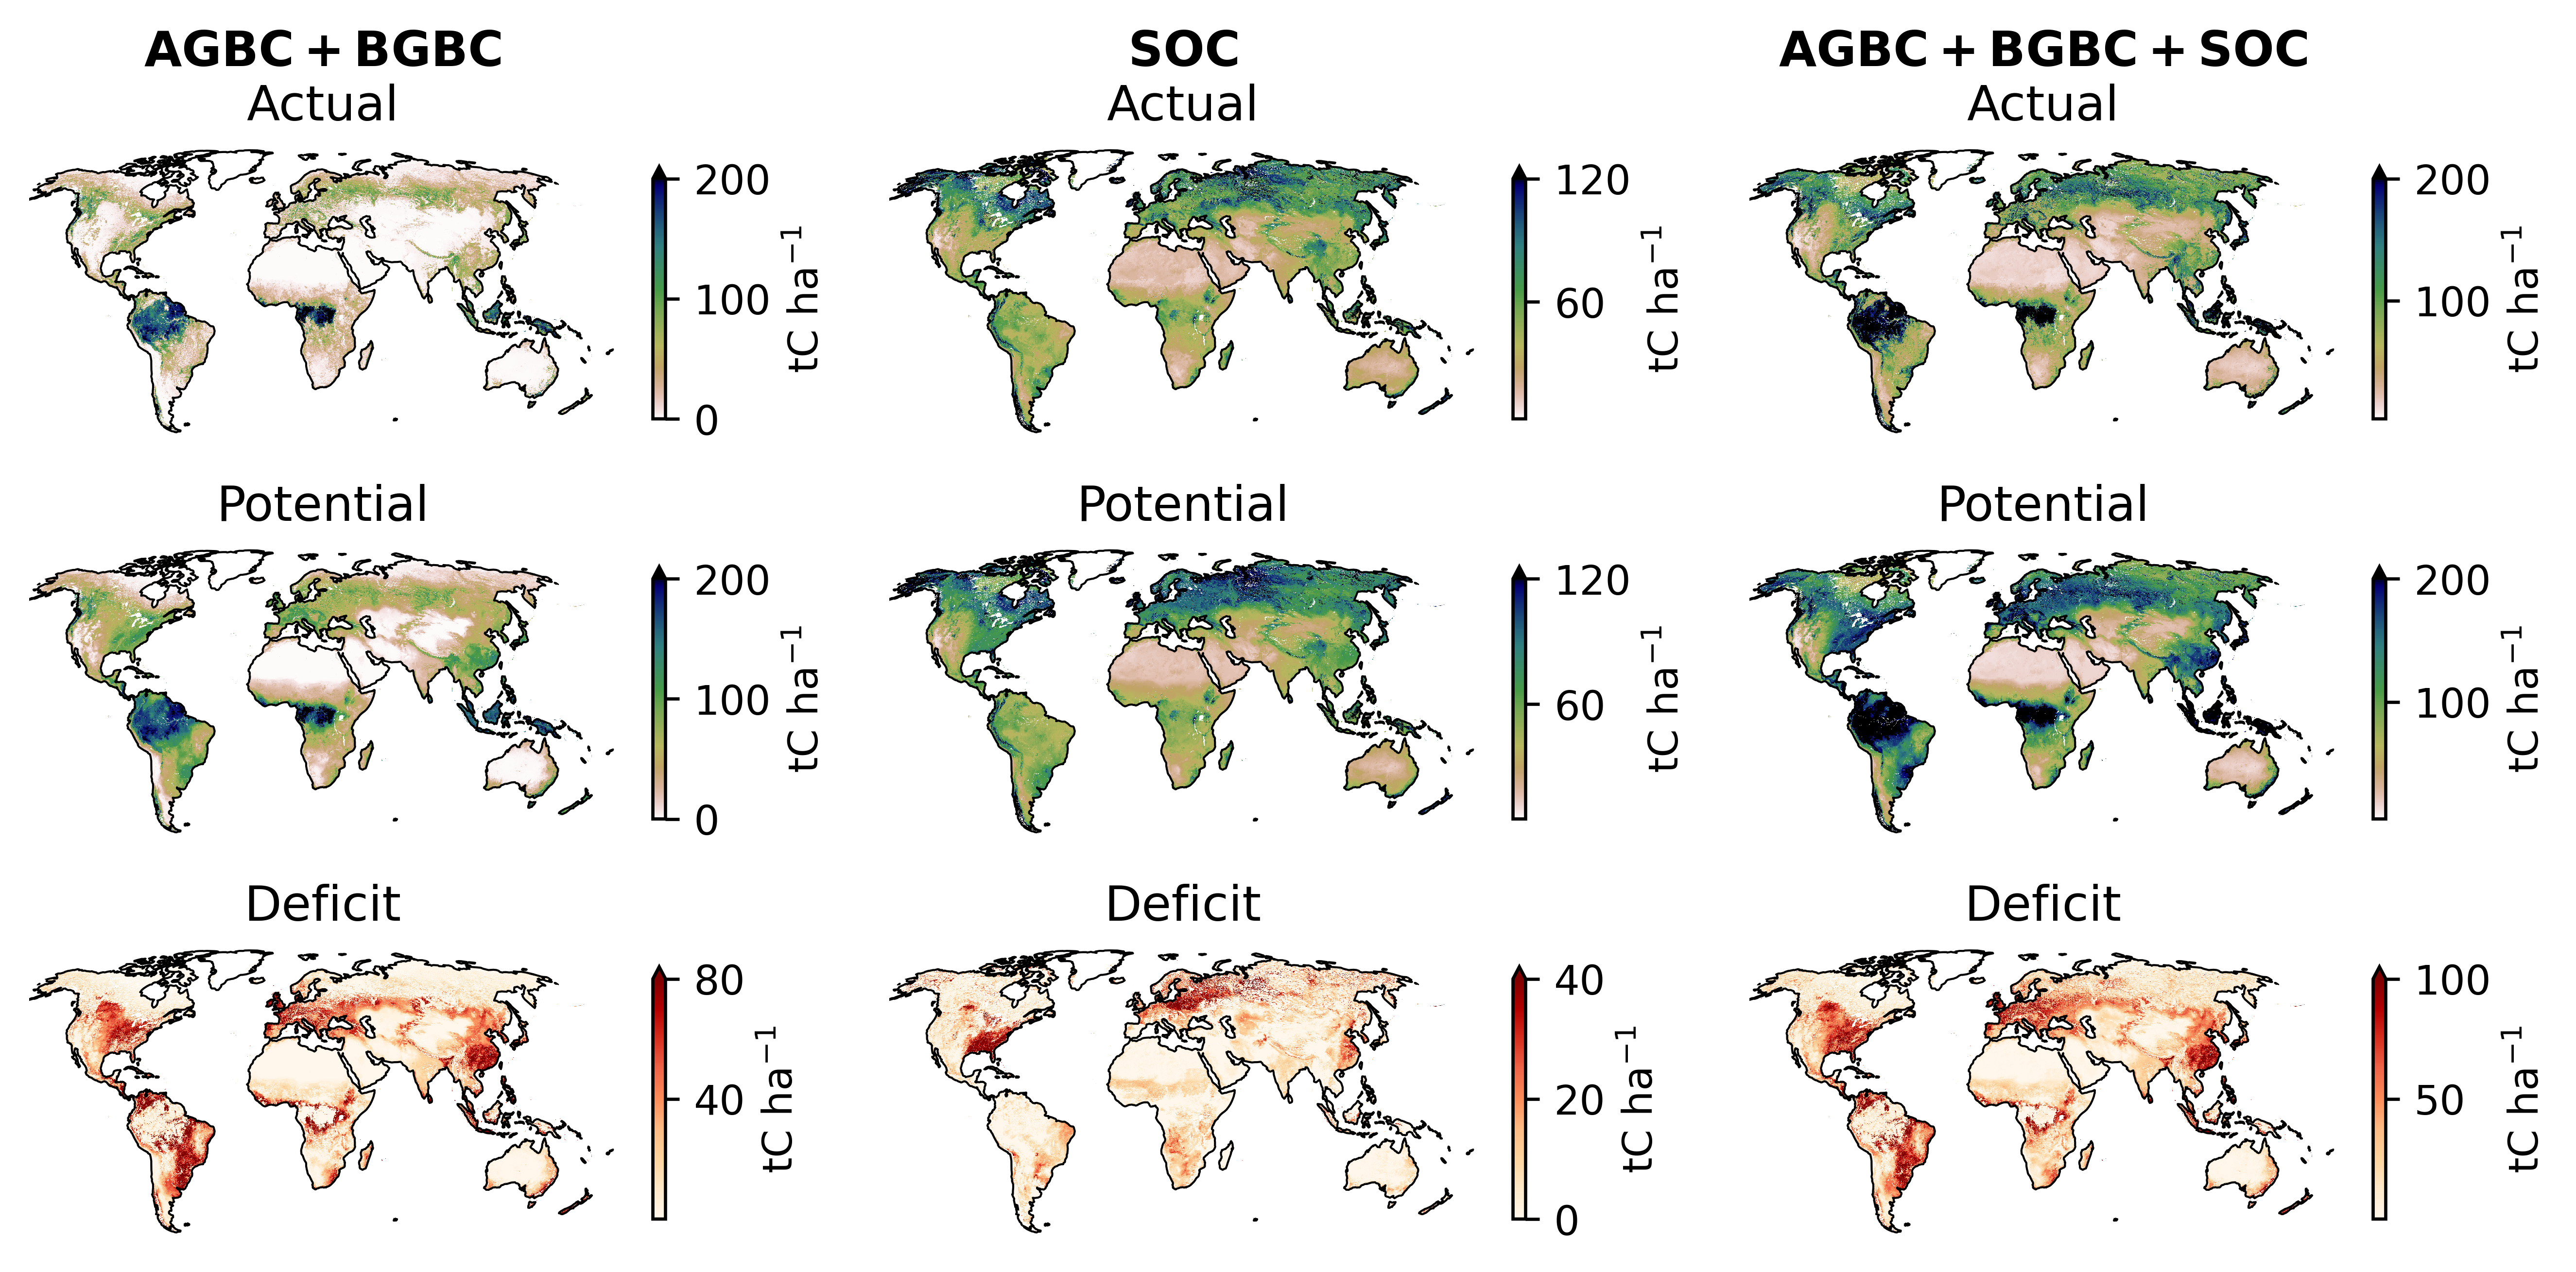

In [6]:
%%time
# Plot
fig = plt.figure(figsize=(9, 4.5), dpi=600)
fig.set_facecolor('#ffffff')

ax0 = fig.add_subplot(3,3,1, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax1 = fig.add_subplot(3,3,2, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax2 = fig.add_subplot(3,3,3, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax3 = fig.add_subplot(3,3,4, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax4 = fig.add_subplot(3,3,5, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax5 = fig.add_subplot(3,3,6, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax6 = fig.add_subplot(3,3,7, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax7 = fig.add_subplot(3,3,8, projection=ccrs.Robinson(central_longitude=10), aspect='auto')
ax8 = fig.add_subplot(3,3,9, projection=ccrs.Robinson(central_longitude=10), aspect='auto')

for i in [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    coastline110.plot(ax=i, transform=ccrs.PlateCarree(), 
                      color='#000000', linewidth=0.5)
    i.set_extent((-180, 180, -60, 90), ccrs.PlateCarree())
    i.axis('off')


(ds_agbc.agbc_max_act + ds_bgbc.bgbc_max_act) \
    .plot.imshow(ax=ax0, transform=ccrs.PlateCarree(), 
                 cmap='gist_earth_r', vmax=200,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', shrink=0.75))

ds_soc.soc_mean_act  \
    .plot.imshow(ax=ax1, transform=ccrs.PlateCarree(), 
                 cmap='gist_earth_r', vmax=120,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', ticks=[60, 120], shrink=0.75))

(ds_agbc.agbc_max_act + ds_bgbc.bgbc_max_act + ds_soc.soc_mean_act) \
    .plot.imshow(ax=ax2, transform=ccrs.PlateCarree(), 
                 cmap='gist_earth_r', vmax=200,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', shrink=0.75))

(ds_agbc.agbc_max_prim + ds_bgbc.bgbc_max_prim) \
    .plot.imshow(ax=ax3, transform=ccrs.PlateCarree(), 
                 cmap='gist_earth_r', vmax=200,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', shrink=0.75))

ds_soc.soc_mean_prim \
    .plot.imshow(ax=ax4, transform=ccrs.PlateCarree(), 
                 cmap='gist_earth_r', vmax=120,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', ticks=[60, 120], shrink=0.75))

(ds_agbc.agbc_max_prim + ds_bgbc.bgbc_max_prim + ds_soc.soc_mean_prim) \
    .plot.imshow(ax=ax5, transform=ccrs.PlateCarree(), 
                 cmap='gist_earth_r', vmax=200,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', shrink=0.75))

((ds_agbc.agbc_max_prim + ds_bgbc.bgbc_max_prim) - 
 (ds_agbc.agbc_max_act + ds_bgbc.bgbc_max_act)) \
    .plot.imshow(ax=ax6, transform=ccrs.PlateCarree(), 
                 cmap = 'OrRd', vmax=80,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', ticks=[40, 80], shrink=0.75))

(ds_soc.soc_mean_prim - ds_soc.soc_mean_act) \
    .plot.imshow(ax=ax7, transform=ccrs.PlateCarree(), 
                 cmap = 'OrRd', vmax=40,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', shrink=0.75))

((ds_agbc.agbc_max_prim + ds_bgbc.bgbc_max_prim + ds_soc.soc_mean_prim) - 
 (ds_agbc.agbc_max_act + ds_bgbc.bgbc_max_act + ds_soc.soc_mean_act)) \
    .plot.imshow(ax=ax8, transform=ccrs.PlateCarree(), 
                 cmap = 'OrRd', vmax=100,
                 cbar_kwargs=dict(label = 'tC ha$^{-1}$', ticks=[50, 100], shrink=0.75))


ax0.set_title(r'$\bf{AGBC + BGBC}$' + '\nActual')
ax1.set_title(r'$\bf{SOC}$' + '\nActual')
ax2.set_title(r'$\bf{AGBC + BGBC + SOC}$' + '\nActual')

ax3.set_title('Potential')
ax4.set_title('Potential')
ax5.set_title('Potential')

ax6.set_title('Deficit')
ax7.set_title('Deficit')
ax8.set_title('Deficit')

plt.tight_layout()

plt.savefig(os.path.join(dir06, 'pdf/fig02_spatial_carbon_maps.pdf'), bbox_inches='tight', dpi=600)
plt.savefig(os.path.join(dir06, 'png/fig02_spatial_carbon_maps.png'), bbox_inches='tight', dpi=600);

In [7]:
cluster.close()